In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from utils.nets import *

In [2]:
# Constants

LEARNING_RATE = 0.001
EXP_DECAY = 0.0001

batch_size = 4
cifar10_momentum = 0.9

# Files
CIFAR10_model_file = "./logs/cifar_10_cnn.pt"
VGG11_model_file = "./logs/vgg11.pt"
VGG19_model_file = "./logs/vgg19.pt"

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
CIFAR10_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
CIFAR10_trainloader = torch.utils.data.DataLoader(CIFAR10_trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

CIFAR10_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
CIFAR10_testloader = torch.utils.data.DataLoader(CIFAR10_testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

CIFAR10_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

CIFAR10_cnn = CIFAR10Cnn(8)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
vgg11 = torchvision.models.vgg11(progress=True)
vgg19 = torchvision.models.vgg19(progress=True)

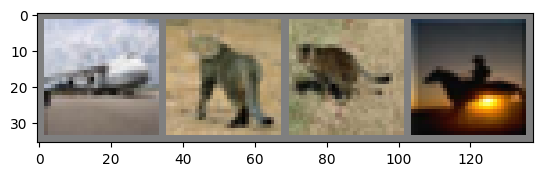

plane cat   cat   horse


In [9]:
# Numpy function to show images for verification

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(CIFAR10_trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{CIFAR10_classes[labels[j]]:5s}' for j in range(batch_size)))


In [11]:
criterion = nn.CrossEntropyLoss()
CIFAR10_optimizer = optim.SGD(CIFAR10_cnn.parameters(), lr=LEARNING_RATE, momentum=cifar10_momentum)
